In [1]:
from vedo import embedWindow
embedWindow(None)

from brainrender import Scene
import brainrender
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.getcwd()

'C:\\Users\\thoma\\Documents\\M1_Neurasmus\\NeuroBIM_M1\\Internship\\GitRepo\\PathoSpreading'

In [4]:
data_cpu = pd.read_csv('../output/predicted_pathology.csv')
data_sn = pd.read_csv('../output/predicted_pathology_seedSN.csv')

In [5]:
reg_names = pd.read_excel('./Data83018/BrainR_ROInames.xlsx')

In [6]:
data_cpu.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions
0,0,0.285313,0.354758,0.348739,iCg
1,1,0.012263,0.058409,0.128091,iAcb
2,2,0.013305,0.053030,0.100022,iTC
3,3,0.352187,0.395984,0.371742,iAI
4,4,0.250713,0.312540,0.317882,iAI-b


In [7]:
data_sn.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions
0,0,0.006276,0.008956,0.008896,iCg
1,1,0.005459,0.005018,0.004851,iAcb
2,2,0.000790,0.001940,0.003049,iTC
3,3,0.006451,0.009770,0.009329,iAI
4,4,0.006004,0.008185,0.008228,iAI-b


In [8]:
reg_names.head()

,BrainR,ROInames,Side
0,ACA,iCg,ispi
1,ACB,iAcb,ispi
2,LHA,iTC,ispi
3,VMH,iTC,ispi
4,AHN,iTC,ispi


# Matching Predicted Values and BrainRender name - Seed CPu

In [9]:
for r in data_cpu.index:
    
    names = reg_names[reg_names['ROInames'] == data_cpu.loc[r, 'regions']]['BrainR']
    
    if len(names) > 1:
         data_cpu.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_cpu.loc[r, 'br_regions'] = names.values

In [10]:
for r in data_cpu.index:
    
    if data_cpu.loc[r, 'regions'][0] == 'i':
        data_cpu.loc[r, 'hem'] = 'right'
    elif data_cpu.loc[r, 'regions'][0] == 'c':
        data_cpu.loc[r, 'hem'] = 'left' 

In [11]:
data_cpu.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions,br_regions,hem
0,0,0.285313,0.354758,0.348739,iCg,ACA,right
1,1,0.012263,0.058409,0.128091,iAcb,ACB,right
2,2,0.013305,0.053030,0.100022,iTC,LHA,right
3,3,0.352187,0.395984,0.371742,iAI,AId,right
4,4,0.250713,0.312540,0.317882,iAI-b,GU,right


# Matching Predicted Values and BrainRender name - Seed SN

In [12]:
for r in data_sn.index:
    
    names = reg_names[reg_names['ROInames'] == data_sn.loc[r, 'regions']]['BrainR']
    
    if len(names) > 1:
         data_sn.loc[r, 'br_regions'] = list(names)[0]
    elif len(names) == 1:    
        data_sn.loc[r, 'br_regions'] = names.values   

In [13]:
for r in data_sn.index:
    
    if data_sn.loc[r, 'regions'][0] == 'i':
        data_sn.loc[r, 'hem'] = 'right'
    elif data_sn.loc[r, 'regions'][0] == 'c':
        data_sn.loc[r, 'hem'] = 'left'

In [14]:
data_sn.head()

,Unnamed: 0,MPI1,MPI3,MPI6,regions,br_regions,hem
0,0,0.006276,0.008956,0.008896,iCg,ACA,right
1,1,0.005459,0.005018,0.004851,iAcb,ACB,right
2,2,0.000790,0.001940,0.003049,iTC,LHA,right
3,3,0.006451,0.009770,0.009329,iAI,AId,right
4,4,0.006004,0.008185,0.008228,iAI-b,GU,right


# Normalization of the values

In [15]:
# Normalization using MPI6 - Seed CPu
data_cpu['MPI6'] = (data_cpu['MPI6'] - np.min(data_cpu['MPI6'])) / (np.max(data_cpu['MPI6']) - np.min(data_cpu['MPI6']))
data_cpu['MPI3'] = (data_cpu['MPI3'] - np.min(data_cpu['MPI6'])) / (np.max(data_cpu['MPI6']) - np.min(data_cpu['MPI6']))
data_cpu['MPI1'] = (data_cpu['MPI1'] - np.min(data_cpu['MPI6'])) / (np.max(data_cpu['MPI6']) - np.min(data_cpu['MPI6']))

In [16]:
# Normalization using MPI6 - Seed SN
data_sn['MPI6'] = (data_sn['MPI6'] - np.min(data_sn['MPI6'])) / (np.max(data_sn['MPI6']) - np.min(data_sn['MPI6']))
data_sn['MPI3'] = (data_sn['MPI3'] - np.min(data_sn['MPI6'])) / (np.max(data_sn['MPI6']) - np.min(data_sn['MPI6']))
data_sn['MPI1'] = (data_sn['MPI1'] - np.min(data_sn['MPI6'])) / (np.max(data_sn['MPI6']) - np.min(data_sn['MPI6']))

In [17]:
data_cpu = data_cpu.dropna()
data_sn = data_sn.dropna()

# Brain Render - Videos

In [18]:
cmap = plt.get_cmap('YlOrRd')

In [23]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [24]:
#VIDEOS
from brainrender import Scene
from brainrender.video import VideoMaker
from brainrender import Scene, Animation
import ffmpeg

# Create a scene
scene = Scene(title="MPI6_Seed_CPu", atlas_name='allen_mouse_25um', inset=False, screenshots_folder=None)
for r in data_cpu.index:
    
    region_to_plot = data_cpu.loc[r, "br_regions"]
    color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
    alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    
    #scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6']) 
    scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6'], hemisphere=data_cpu.loc[r, 'hem'], silhouette=None) 

    
# Make a custom make frame function
def make_frame(scene, frame_number, *args, **kwargs):
    alpha = scene.root.alpha()
    if alpha < 0.5:
        scene.root.alpha(1)
    else:
        scene.root.alpha(0.2)

# Create an instance of video maker
vm = VideoMaker(scene=scene,save_fld="../videos",
        name="test",
        fmt="mp4",size="1620x1050",make_frame_func=make_frame)
# make a video with the custom make frame function
# this just rotates the scene
vm.make_video(elevation=2, duration=2, fps=25)

Generating frames ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

Saving video

ffmpeg returned an error while trying to save video with command: 
 ffmpeg -hide_banner -loglevel panic -y -r 25 -start_number 0 -i 
 C:\Users\thoma\AppData\Local\Temp\tmpu1c1h6dz\%d.png -vcodec libx264 -crf 28 -pix_fmt yuv420p 
 -s 162 0x1050 test.mp4

'..\\videos/test.mp4'

In [225]:
from brainrender import Scene, Animation    #####NOT WORKING YET
# Create a brainrender scene
scene = Scene(title="brain regions", inset=False)

# Add brain regions
scene.add_brain_region("TH")

anim = Animation(scene, "../videos", "vid3")

# Specify camera position and zoom at some key frames
# each key frame defines the scene's state after n seconds have passed
anim.add_keyframe(0, camera="top", zoom=1.3)

# Make videos
anim.make_video(duration=3, fps=10)

Generating frames... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

Saving video

ffmpeg returned an error while trying to save video with command: 
 ffmpeg -hide_banner -loglevel panic -y -r 10 -start_number 0 -i 
 C:\Users\thoma\AppData\Local\Temp\tmpy6ysy4zs\%d.png -vcodec libx264 -crf 28 -pix_fmt yuv420p 
 -s 162 0x1050 vid3.mp4

'..\\videos/vid3.mp4'

# Brain Render -Scenes

In [197]:
from brainrender import Scene
from tqdm import tqdm

# Create a brainrender scene
scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender")
brainrender.settings.SHOW_AXES = False


# Add brain regions Scene 1
for r in data_cpu.index:
    
    region_to_plot = data_cpu.loc[r, "br_regions"]
    color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
    alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    
    #scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6']) 
    scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6'], hemisphere=data_cpu.loc[r, 'hem'], silhouette=False) #Alpha varies according to values
    

brainrender.settings.SHADER_STYLE = "plastic" #[metallic, plastic, shiny, glossy]
brainrender.settings.ROOT_ALPHA = 0.3 
brainrender.settings.ROOT_COLOR  = [0.8, 0.8, 0.8]
brainrender.settings.OFFSCREEN = False

scene.render(atlas_name='allen_mouse_50um', zoom=1.5, silhouette=None)

Saving new screenshot at brainrender_screenshot_20210302_161505.png

Saving new screenshot at brainrender_screenshot_20210302_161524.png

Saving new screenshot at brainrender_screenshot_20210302_161545.png

Saving new screenshot at brainrender_screenshot_20210302_161552.png

Saving new screenshot at brainrender_screenshot_20210302_161605.png

In [ ]:
# Different Shadering
for shader in ("plastic", "cartoon"):
    brainrender.settings.SHADER_STYLE = shader
    scene = Scene(title=shader)
    scene.render()

 # Brainrender - Sections & Screenshot

In [ ]:
# Cameras
sagittal_camera = {
    "pos": (6514, -34, 36854),
    "viewup": (0, -1, 0),
    "clippingRange": (24098, 49971),
}

sagittal_camera2 = {
    "pos": (9782, 1795, -40999),
    "viewup": (0, -1, 0),
    "clippingRange": (23256, 51031),
}


frontal_camera = {
    "pos": (-19199, -1428, -5763),
    "viewup": (0, -1, 0),
    "clippingRange": (19531, 40903),
}

top_camera = {
    "pos": (7760, -31645, -5943),
    "viewup": (-1, 0, 0),
    "clippingRange": (27262, 45988),
}

top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

three_quarters_camera = {
    "pos": (-20169, -7298, 14832),
    "viewup": (0, -1, 0),
    "clippingRange": (16955, 58963),
}

cameras = dict(
    sagittal=sagittal_camera,
    sagittal2=sagittal_camera2,
    frontal=frontal_camera,
    top=top_camera,
    top_side=top_side_camera,
    three_quarters=three_quarters_camera,
)



In [ ]:
# Screenshot of Horizontal section
#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm
cmap = plt.get_cmap('YlOrRd')

scene = Scene(inset=False,screenshots_folder="../Screenshot_Brainrender")
top_side_camera = {
    "pos": (4405, -31597, -5411),
    "viewup": (0, 0, -1),
    "clippingRange": (26892, 46454),
}

# Add brain regions
for r in data_cpu.index:

    region_to_plot = data_cpu.loc[r, "br_regions"]
    color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
    #alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
    scene.add_brain_region(region_to_plot, color=color, alpha=data_cpu.loc[r, 'MPI6'], hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)

cp = scene.atlas.get_region("CP")
plane = scene.atlas.get_plane(pos=cp.centerOfMass(), plane="horizontal", norm=(0, 1, 0), alpha=1)
scene.slice(plane=plane, close_actors=True)


brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
brainrender.settings.ROOT_ALPHA = 0.15
brainrender.settings.ROOT_COLOR  = [0.8, 0.8, 0.8]
brainrender.settings.OFFSCREEN = False
brainrender.settings.SHOW_AXES = False
brainrender.settings.BACKGROUND_COLOR = "White"
scene.render(atlas_name='allen_mouse_50um', camera=top_side_camera, zoom=1.5)
#scene.screenshot(name="TESThori".format(section/1000), scale = 3)


In [40]:
# Screenshot of sections 

#ATLAS 100 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +3000, +4040] # Bregma corresponding coordinates

for section in list_coor:
    bregma = np.array([5400,  # AP    
          0,  # DV    
          5700,]) # ML

    bregma[0] = bregma[0] + section
    
    # Create a brainrender scene
    scene = Scene(title="-Atlas 100 um- Coronal section Bregma {} mm -150um thickness".format(section/1000), inset=False,screenshots_folder="../Screenshot_Brainrender")
    frontal_camera = {
         'pos': (-19781, 3777, -5832),
         'viewup': (0, -1, 0),
         'clippingRange': (24465, 26836),
        'focalPoint': (5705, 3991, -5691),
         'distance': 25487}

    # Add brain regions
    for r in data_cpu.index:

        region_to_plot = data_cpu.loc[r, "br_regions"]
        color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
        alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
        

    plane_1 = scene.atlas.get_plane(pos=bregma+75, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=bregma-75, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    scaling_color = 0#(section/1000)
    brainrender.settings.ROOT_COLOR  = [1 - scaling_color, 1 - scaling_color, 1 - scaling_color]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_100um', camera= frontal_camera, zoom=1.5)
    scene.screenshot(name="100um_Coro_Breg_{}_mm".format(section/1000), scale = 3)
    

Saving new screenshot at 100um_Coro_Breg_- 1. 7_mm.png

Saving new screenshot at 100um_Coro_Breg_0.0_mm.png

Saving new screenshot at 100um_Coro_Breg_3.0_mm.png

Saving new screenshot at 100um_Coro_Breg_4.04_mm.png

In [42]:
#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +3000, +4040] # Bregma corresponding coordinates

for section in list_coor:
    bregma = np.array([5400,  # AP    
          0,  # DV    
          5700,]) # ML

    bregma[0] = bregma[0] + section
    
    # Create a brainrender scene
    scene = Scene(title="-Atlas 50 um- Coronal section Bregma {} mm -150um thickness".format(section/1000), inset=False,screenshots_folder="../Screenshot_Brainrender")
    frontal_camera = {
         'pos': (-19781, 3777, -5832),
         'viewup': (0, -1, 0),
         'clippingRange': (24465, 26836),
        'focalPoint': (5705, 3991, -5691),
         'distance': 25487}

    # Add brain regions
    for r in data_cpu.index:

        region_to_plot = data_cpu.loc[r, "br_regions"]
        color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
        alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
        

    plane_1 = scene.atlas.get_plane(pos=bregma+75, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=bregma-75, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1, 1, 1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
    scene.screenshot(name="50um_Coro_Breg_{}_mm".format(section/1000), scale = 3)
    

Saving new screenshot at 50um_Coro_Breg_- 1. 7_mm.png

Saving new screenshot at 50um_Coro_Breg_0.0_mm.png

Saving new screenshot at 50um_Coro_Breg_3.0_mm.png

Saving new screenshot at 50um_Coro_Breg_4.04_mm.png

In [43]:
#ATLAS 25 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +3000, +4040] # Bregma corresponding coordinates

for section in list_coor:
    bregma = np.array([5400,  # AP    
          0,  # DV    
          5700,]) # ML

    bregma[0] = bregma[0] + section
    
    # Create a brainrender scene
    scene = Scene(title="-Atlas 25 um- Coronal section Bregma {} mm -150um thickness".format(section/1000), inset=False,screenshots_folder="../Screenshot_Brainrender")
    frontal_camera = {
         'pos': (-19781, 3777, -5832),
         'viewup': (0, -1, 0),
         'clippingRange': (24465, 26836),
        'focalPoint': (5705, 3991, -5691),
         'distance': 25487}

    # Add brain regions
    for r in data_cpu.index:

        region_to_plot = data_cpu.loc[r, "br_regions"]
        color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
        alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
        scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
        

    plane_1 = scene.atlas.get_plane(pos=bregma+75, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=bregma-75, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1,1,1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_25um', camera= frontal_camera, zoom=1.5)
    scene.screenshot(name="25um_Coro_Breg_{}_mm".format(section/1000), scale = 3)
    

Saving new screenshot at 25um_Coro_Breg_- 1. 7_mm.png

Saving new screenshot at 25um_Coro_Breg_0.0_mm.png

Saving new screenshot at 25um_Coro_Breg_3.0_mm.png

Saving new screenshot at 25um_Coro_Breg_4.04_mm.png

In [ ]:
# Center of mass CPu & SN

#ATLAS 50 um, thickness 150um
from brainrender import Scene, atlas
from tqdm import tqdm
scene=Scene(atlas_name='allen_mouse_50um')
cp = scene.atlas.get_region("CP")
sn = scene.atlas.get_region("SNc")
list_reg=[cp,sn]
frontal_camera = {
     'pos': (-19781, 3777, -5832),
     'viewup': (0, -1, 0),
     'clippingRange': (24465, 26836),
    'focalPoint': (5705, 3991, -5691),
     'distance': 25487}

for i in list_reg: 
    if i == cp:
        scene = Scene(atlas_name='allen_mouse_50um', title="-Atlas 50 um- Coronal section CPu  -50um thickness", inset=False,screenshots_folder="../Screenshot_Brainrender")
        for r in data_cpu.index:
            region_to_plot = data_cpu.loc[r, "br_regions"]
            color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
            alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)
    else:
        scene = Scene(atlas_name='allen_mouse_50um', title="-Atlas 50 um- Coronal section SN  -50um thickness", inset=False,screenshots_folder="../Screenshot_Brainrender")
        for r in data_cpu.index:
            region_to_plot = data_cpu.loc[r, "br_regions"]
            color = cmap(data_cpu.loc[r, 'MPI6'])[:3]
            alpha =  cmap(data_cpu.loc[r, 'MPI6'])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)

        
    plane_1 = scene.atlas.get_plane(pos=i.centerOfMass()+25, plane="frontal", norm=(-1, 0, 0), sx=100, alpha=1, color="white") # Thickness: 150 um
    plane_2 = scene.atlas.get_plane(pos=i.centerOfMass()-25, plane="frontal", norm=(1, 0, 0), sx=100, alpha=1, color="white")
    scene.slice(plane_1, close_actors=True)
    scene.slice(plane_2, close_actors=True)
    
    
    brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
    brainrender.settings.ROOT_ALPHA = 0.15
    brainrender.settings.ROOT_COLOR  = [1, 1, 1]
    brainrender.settings.OFFSCREEN = True
    brainrender.settings.SHOW_AXES = False
    brainrender.settings.BACKGROUND_COLOR = "white"
    scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
    if i == cp:
        scene.screenshot(name="50um_Coro_CPu", scale = 3)
    else:
        scene.screenshot(name="50um_Coro_SNc", scale = 3)
    scene.close()

# Creation of the figure

In [ ]:
import matplotlib.pyplot as plt
#Main Axes  V
plt.axes([0.1,0.1,1.2,1.2])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, '1',ha='center',va='center',size=20,alpha=.5)


#Right Axe
#plt.axes([0.9,0.15,.35,1.1])
#plt.xticks([]), plt.yticks([])
#plt.text(0.5,0.5, 'axes([0.6,0.1,.3,.8])',ha='center',va='center',size=16,alpha=.5)

#Right - Top part
plt.axes([0.9,0.975,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#Right - Middle up part
plt.axes([0.9,0.7,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#Right - Middle Down part
plt.axes([0.9,0.425,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#Right- Down part
plt.axes([0.9,0.150,.35,0.275])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#LEFT - UP and DOWN axes  V
plt.axes([0.15,0.70,0.70,0.55])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

plt.axes([0.15,0.15,0.7,0.55])
plt.xticks([]), plt.yticks([])
#plt.text(0.1,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#plt.savefig("../figures/axes.png",dpi=64)
plt.show()()

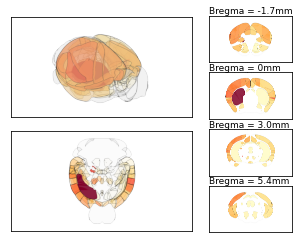

In [20]:
from pylab import *
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

list_coor = [-1700, 0, +3000, +4040] # Bregma corresponding coordinates
image=[]
for section in list_coor:
    Cor = Image.open("../Screenshot_Brainrender/50um_Coro_Breg_{}_mm.png".format(section/1000))
    image.append(Cor)

hor = Image.open("../Screenshot_Brainrender/50um_Horizontal_CoMassCPu (5).png")
whole = Image.open("../Screenshot_Brainrender/50um_Whole (7).png")

G = gridspec.GridSpec(nrows=4, ncols=3,left=0.25)

axes_1 = subplot(G[0:2, 0:2])
xticks([]), yticks([])
#text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)
plt.imshow(whole)

axes_2 = subplot(G[2:4,0:2])
xticks([]), yticks([])
#text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)
plt.imshow(hor)

axes_3 = subplot(G[0, 2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = -1.7mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[0])

axes_4 = subplot(G[1,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 0mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[1])

axes_5 = subplot(G[2,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 3.0mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[2])


axes_6 = subplot(G[3,2])
xticks([]), yticks([])
text(0.5,0.5, 'Bregma = 5.4mm',ha='left',va='bottom',size=9,alpha=1)
plt.imshow(image[3])

plt.savefig('../Screenshot_Brainrender/Summary_figure.png', dpi=300)
plt.savefig('../Screenshot_Brainrender/Summary_figure.pdf', dpi=300)
plt.show()

# Different MPI and Seeding

# a) Seed = CPU

In [21]:
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +3000, +4040] # Bregma corresponding coordinates
timepoints = [1,3,6]
for t in tqdm(timepoints):
    
    for section in list_coor:
        bregma = np.array([5400,  # AP    
              0,  # DV    
              5700,]) # ML

        bregma[0] = bregma[0] + section

        # Create a brainrender scene
        scene = Scene(title="-Coronal section Bregma {} mm -50um thickness- Seed = CPu - MPI {}".format(section/1000,t), inset=False,screenshots_folder="../Screenshot_Brainrender/CPu_MPIs")
        frontal_camera = {
             'pos': (-19781, 3777, -5832),
             'viewup': (0, -1, 0),
             'clippingRange': (24465, 26836),
            'focalPoint': (5705, 3991, -5691),
             'distance': 25487}

        # Add brain regions
        for r in data_cpu.index:

            region_to_plot = data_cpu.loc[r, "br_regions"]
            color = cmap(data_cpu.loc[r, 'MPI{}'.format(t)])[:3]
            alpha =  cmap(data_cpu.loc[r, 'MPI{}'.format(t)])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_cpu.loc[r, 'hem'], silhouette=True)


        plane_1 = scene.atlas.get_plane(pos=bregma+50, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
        plane_2 = scene.atlas.get_plane(pos=bregma-50, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
        scene.slice(plane_1, close_actors=True)
        scene.slice(plane_2, close_actors=True)


        brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
        brainrender.settings.ROOT_ALPHA = 0.15
        brainrender.settings.ROOT_COLOR  = [1, 1, 1]
        brainrender.settings.OFFSCREEN = True
        brainrender.settings.SHOW_AXES = False
        brainrender.settings.BACKGROUND_COLOR = "white"
        scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
        scene.screenshot(name="50um_CPu_MPI{}_Breg_{}_mm".format(t,section/1000), scale = 3)

  0%|          | 0/3 [00:00<?, ?it/s]

Saving new screenshot at 50um_CPu_MPI1_Breg_- 1. 7_mm.png

Saving new screenshot at 50um_CPu_MPI1_Breg_0.0_mm.png

Saving new screenshot at 50um_CPu_MPI1_Breg_3.0_mm.png

Saving new screenshot at 50um_CPu_MPI1_Breg_4.04_mm.png

 33%|███▎      | 1/3 [01:14<02:29, 74.64s/it]

Saving new screenshot at 50um_CPu_MPI3_Breg_- 1. 7_mm.png

Saving new screenshot at 50um_CPu_MPI3_Breg_0.0_mm.png

Saving new screenshot at 50um_CPu_MPI3_Breg_3.0_mm.png

Saving new screenshot at 50um_CPu_MPI3_Breg_4.04_mm.png

 67%|██████▋   | 2/3 [02:27<01:14, 74.04s/it]

Saving new screenshot at 50um_CPu_MPI6_Breg_- 1. 7_mm.png

Saving new screenshot at 50um_CPu_MPI6_Breg_0.0_mm.png

Saving new screenshot at 50um_CPu_MPI6_Breg_3.0_mm.png

Saving new screenshot at 50um_CPu_MPI6_Breg_4.04_mm.png

100%|██████████| 3/3 [03:44<00:00, 74.69s/it]


# b) Seed = SNc

In [ ]:
from brainrender import Scene, atlas
from tqdm import tqdm

list_coor = [-1700, 0, +3000, +4040] # Bregma corresponding coordinates
timepoints = [1,3,6]
for t in tqdm(timepoints):
    
    for section in list_coor:
        bregma = np.array([5400,  # AP    
              0,  # DV    
              5700,]) # ML

        bregma[0] = bregma[0] + section

        # Create a brainrender scene
        scene = Scene(title="-Coronal section Bregma {} mm -50um thickness- Seed = SN - MPI {}".format(section/1000,t), inset=False,screenshots_folder="../Screenshot_Brainrender/SN_MPIs")
        frontal_camera = {
             'pos': (-19781, 3777, -5832),
             'viewup': (0, -1, 0),
             'clippingRange': (24465, 26836),
            'focalPoint': (5705, 3991, -5691),
             'distance': 25487}

        # Add brain regions
        for r in data_sn.index:

            region_to_plot = data_sn.loc[r, "br_regions"]
            color = cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
            alpha =  cmap(data_sn.loc[r, 'MPI{}'.format(t)])[:3]
            scene.add_brain_region(region_to_plot, color=color, alpha=1, hemisphere=data_sn.loc[r, 'hem'], silhouette=True) #alpha=data_cpu.loc[r, 'MPI{}'.format(t)]


        plane_1 = scene.atlas.get_plane(pos=bregma+50, plane="frontal", norm=(-1, 0, 0), alpha=1, color="white") # Thickness: 150 um
        plane_2 = scene.atlas.get_plane(pos=bregma-50, plane="frontal", norm=(1, 0, 0), alpha=1, color="white")
        scene.slice(plane_1, close_actors=True)
        scene.slice(plane_2, close_actors=True)


        brainrender.settings.SHADER_STYLE = "cartoon" #[metallic, plastic, shiny, glossy]
        brainrender.settings.ROOT_ALPHA = 0.15
        brainrender.settings.ROOT_COLOR  = [1, 1, 1]
        brainrender.settings.OFFSCREEN = False
        brainrender.settings.SHOW_AXES = False
        brainrender.settings.BACKGROUND_COLOR = "white"
        scene.render(atlas_name='allen_mouse_50um', camera= frontal_camera, zoom=1.5)
        scene.screenshot(name="50um_SNc_MPI{}_Breg_{}_mm".format(t,section/1000), scale = 3)

In [23]:
data_sn

,Unnamed: 0,MPI1,MPI3,MPI6,regions,br_regions,hem
0,0,0.006276,0.008956,0.464012,iCg,ACA,right
1,1,0.005459,0.005018,0.209909,iAcb,ACB,right
2,2,0.000790,0.001940,0.096681,iTC,LHA,right
3,3,0.006451,0.009770,0.491212,iAI,AId,right
4,4,0.006004,0.008185,0.422023,iAI-b,GU,right
...,...,...,...,...,...,...,...
111,111,0.002261,0.005201,0.278061,cTeA,TEa,left
112,112,0.004316,0.010534,0.622169,cIns,VISC,left
113,113,0.000806,0.003196,0.194970,cV,VIS,left
114,114,0.000442,0.002355,0.168030,cV-b,VISpm,left
